In [10]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

tf.__version__

'2.15.0'

##Preparing the data

In [3]:
insurance=pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [6]:
#numerical vs categorical columns
#creating numerical encoding for categorical columns - ONE HOT ENCODING
insurance_one_hot=pd.get_dummies(insurance, dtype=int)
insurance_one_hot

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [7]:
#create X (feats) and y(labels) values
X = insurance_one_hot.drop("charges", axis=1)
y= insurance_one_hot["charges"]

In [8]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [9]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [11]:
#####Split a cell (cmd+m+-)
#create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

##Build a model

In [12]:
tf.random.set_seed(42)
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model.compile(loss=tf.keras.losses.mae,
                  optimizer=tf.keras.optimizers.SGD(),
                  metrics=["mae"])

insurance_model.fit(X_train, y_train, epochs=100)


Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 8628.4893 - mae: 8628.4893
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 7878.9756 - mae: 7878.9756
Epoch 3/100
34/34 [==============================] - 0s 5ms/step - loss: 7543.8848 - mae: 7543.8848
Epoch 4/100
34/34 [==============================] - 0s 6ms/step - loss: 7694.4146 - mae: 7694.4146
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 7782.0112 - mae: 7782.0112
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 7594.1426 - mae: 7594.1426
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7562.5659 - mae: 7562.5659
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 7791.2949 - mae: 7791.2949
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7600.5703 - mae: 7600.5703
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7780.0488 - mae: 7780.0488

## Evaluate the model

In [14]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7339.7603 - mae: 7339.7603


[7339.76025390625, 7339.76025390625]

In [15]:
#whats this mae is telling us?
#on average our model is wrong by around 7000. Is this significant

#by printing median and mean we see its significant, it means an avg customer pays 13000
#and we are off by 7000!!! Median says if a customer pays 9000,
#our model might charge him just 2000!
y_train.median(),y_train.mean()


(9575.4421, 13346.089736364485)

##Improve the model

### Experiment 1 (Add extra layer with more hidden units)

In [25]:
tf.random.set_seed(42)
insurance_model_2=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

insurance_model_2.fit(X_train, y_train, epochs=100, verbose=0)

###This model gives nan:model may be too complex to learn? changing SGD to Adam fixed it!?

In [26]:
insurance_model_2.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 4891.2373 - mae: 4891.2373


[4891.2373046875, 4891.2373046875]

### Experiment 2: more epochs

In [30]:
tf.random.set_seed(42)
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

history=insurance_model_3.fit(X_train, y_train, epochs=200, verbose=0)


In [31]:
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3499.7456 - mae: 3499.7456


[3499.74560546875, 3499.74560546875]

Text(0.5, 0, 'epochs')

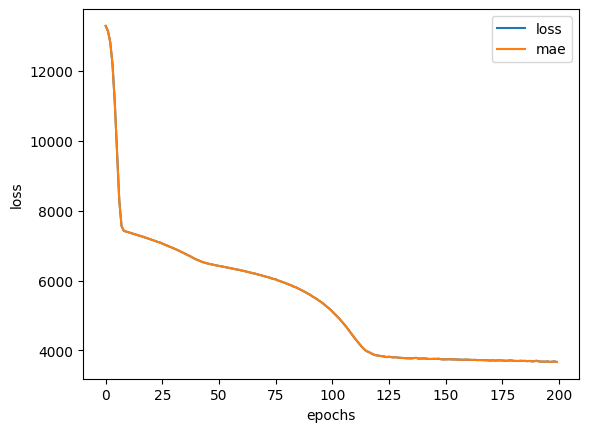

In [32]:
####plot history (also kown as loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

How long should you train for?? Early stopping callback (TF component you can add to your model to stop training when it stops improving a certain metric)

## Preprocessing Data (Normalization and Standardization)

<Axes: ylabel='Frequency'>

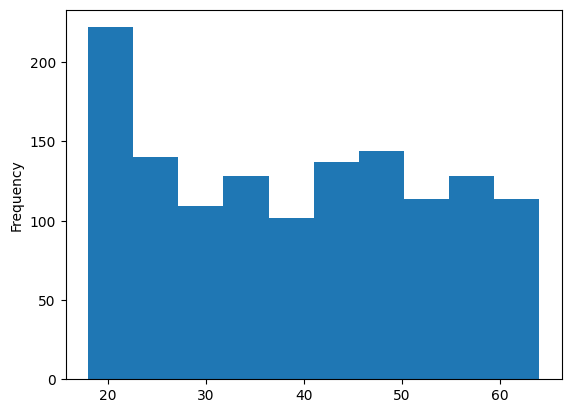

In [34]:
#Let's look at some of our data
X["age"].plot(kind="hist") #all over the place

<Axes: ylabel='Frequency'>

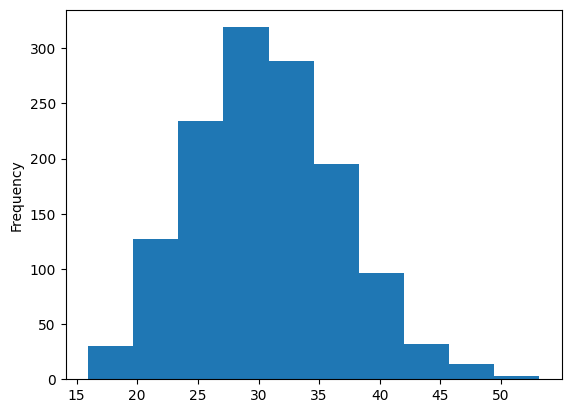

In [35]:
X["bmi"].plot(kind="hist") #different scale than age

In [36]:
X["children"].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

So we notice children are on scale->0-5, BMI->15-50, ~age->20-60
What if you want to bring them all on a common scale, say 0-1

Normalization-> also called scaling; converts all values to between 0-1 whilst preserving the original distribution (MinMaxScaler)

standardization-> Removes the mean and divides each value by standard deviation(StandardScaler)

Caution:standardization transforms a feature to have close to normal distribution, this reduces the effect of outliers!

Why? NN converges faster!

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
insurance=pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [42]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split


In [39]:
#create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), #turn all these columns between 0-1
    (OneHotEncoder(handle_unknown="ignore"),["sex", "smoker", "region"])
)

In [41]:
X=insurance.drop("charges", axis=1)
y=insurance["charges"]

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Fit the column transformer to training data
#you want to fit ct on training data and use that column transformer to transform your test data
#because, otherwise, if you do it separately, the test data set is future! you cant use that data
ct.fit(X_train)

#transform training and test data with normalization(MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)


In [44]:
X_train_normal

array([[0.60869565, 0.10734463, 0.4       , ..., 1.        , 0.        ,
        0.        ],
       [0.63043478, 0.22491256, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.73913043, 0.23944041, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.86956522, 0.24791499, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.41304348, 0.85122411, 0.4       , ..., 0.        , 0.        ,
        1.        ],
       [0.80434783, 0.37503363, 0.        , ..., 0.        , 0.        ,
        1.        ]])

<Axes: ylabel='Frequency'>

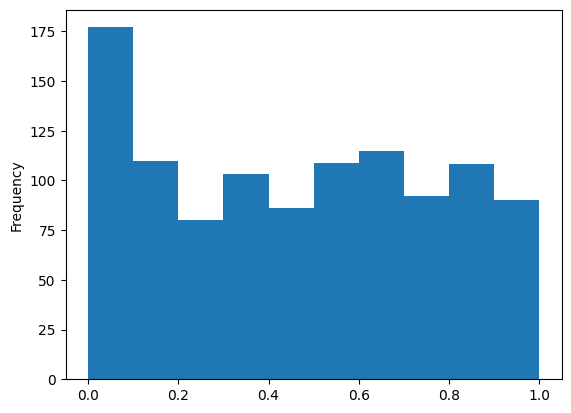

In [48]:
##potting new age, we see a similar distribution to original
pd.DataFrame(X_train_normal)[0].plot(kind="hist")

## Build a NN to fit normalized data

In [55]:
tf.random.set_seed(42)

insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_4.compile(loss= tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])
history = insurance_model_4.fit(X_train_normal, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 13342.8418 - mae: 13342.8418
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 13332.5117 - mae: 13332.5117
Epoch 3/100
34/34 [==============================] - 0s 4ms/step - loss: 13307.9033 - mae: 13307.9033
Epoch 4/100
34/34 [==============================] - 0s 4ms/step - loss: 13257.5967 - mae: 13257.5967
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 13170.1797 - mae: 13170.1797
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 13034.9863 - mae: 13034.9863
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 12842.0811 - mae: 12842.0811
Epoch 8/100
34/34 [==============================] - 0s 4ms/step - loss: 12581.5176 - mae: 12581.5176
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 12243.2490 - mae: 12243.2490
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 11825.99

In [56]:
insurance_model_4.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3436.1135 - mae: 3436.1135


[3436.113525390625, 3436.113525390625]

Text(0.5, 0, 'epochs')

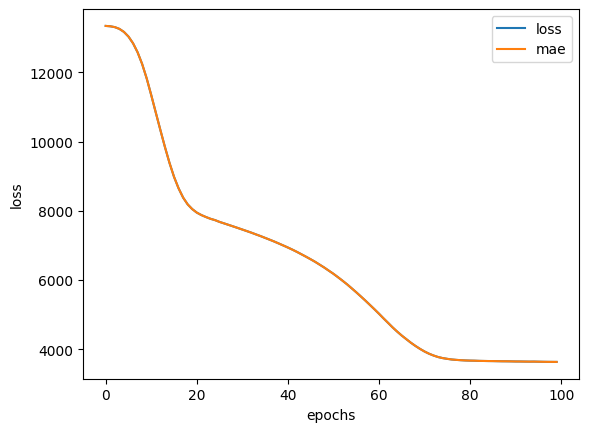

In [57]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")